### Libraries

In [19]:
import pandas
import ipaddress as ip
import re

### Dataset

In [20]:
data = pandas.read_csv("final_dataset.csv").sample(frac=1).reset_index(drop=True)
print(data)

                                                     url  label
0      https://rm-billing.com/secure.php?&amp;session...      1
1                      https://karlory.com/document/2222      1
2          https://infobank.app.link/?platform=hootsuite      1
3      http://doapositioning.com/wp-includes/access/c...      1
4      http://rextraening.dk/wp-content/plugins/salem...      1
5      https://yauohwijrqefqyiywrxzejtqcw-dot-gl09989...      1
6                         http://ingegneriaingonlin.com/      1
7                           https://tinyurl.com/yxvpdevz      1
8                  http://georgina.morris.tripod.com/ajc      0
9      https://servmessagerieinternetclient.yahoosite...      1
10                             http://www.joesalter.com/      0
11     http://creativecombat.com/wp-admin/network/acc...      1
12            http://amazom.co.jp.verification10000.com/      1
13                           https://m54af8.webwave.dev/      1
14                           http://org-

### Feature Set

In [21]:
featureSet = pandas.DataFrame(columns=('URL_Length', 'Dots_Count', 'Suspicious_TLD', 'Hyphen_Count', 'Subdir_Count', 'Domain_Length', 'IP_Present','Double_Slash_Count', 'URL_Shortening_Service', 'Count_SubDomain (Domain_Tokens)', 'Count_Queries', 'Count_At_Symbol', 'Presence of %20', 'digit/letter', 'special_characters'))
featureSet

,URL_Length,Dots_Count,Suspicious_TLD,Hyphen_Count,Subdir_Count,Domain_Length,IP_Present,Double_Slash_Count,URL_Shortening_Service,Count_SubDomain (Domain_Tokens),Count_Queries,Count_At_Symbol,Presence of %20,digit/letter,special_characters


In [22]:
from urllib.parse import urlparse
import tldextract

suspicious_TLD = ['country' , 'kim' , 'science', 'gq', 'work', 'ninja', 'xyz', 'date', 'faith', 'zip', 'racing', 'cricket', 'win','space','accountant','realtor','top','stream','christmas','gdn','mom','pro','men']


shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
def is_ip(url):
    try:
        if ip.ip_address(url):
            return 1
    except:
            return 0
def count_subdomain(sub):
    if not sub:
        return 0
    else:
        return len(sub.split('.'))

def extract_features(url):
    vector = []
    path  = urlparse(url)
    ext = tldextract.extract(url)
    #print(path,ext)


    vector.append(len(url))
    vector.append(url.count('.'))
    vector.append(1 if ext.suffix in suspicious_TLD else 0)
    vector.append(url.count('-'))
    vector.append(path.path.count('/'))
    vector.append(len(path.netloc))
    vector.append(is_ip(url))
    vector.append(url.count('//'))
    vector.append(1 if re.search(shortening_services, url) else 0)
    vector.append(count_subdomain(ext.subdomain))
    vector.append(path.query.count('='))
    vector.append(url.count('@'))
    vector.append(0 if path.path.find('%20')==-1 else 1)
    d=l=spc=0
    for c in url:
        if c.isdigit():
            d=d+1
        elif c.isalpha():
            l=l+1
        else:
            pass
    for c in path.path:
        if c.isdigit():
            pass
        elif c.isalpha():
            pass
        else:
            spc+=1
    vector.append(d/(l if l!=0 else 1))
    vector.append(spc)
    return vector
    

In [23]:
url = 'https://www.drive.google.com/drive/page.php'


print(urlparse(url), tldextract.extract(url))

ParseResult(scheme='https', netloc='www.drive.google.com', path='/drive/page.php', params='', query='', fragment='') ExtractResult(subdomain='www.drive', domain='google', suffix='com')


### Get Features

In [24]:
for i in range(len(data)):
    featureSet.loc[i] = extract_features(data["url"].loc[i])

### Chart

In [25]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
X = featureSet
y = data['label']
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs         Score
0               URL_Length  87467.014294
14      special_characters   3162.325793
3             Hyphen_Count   2981.999352
5            Domain_Length   2715.829394
10           Count_Queries   1552.776125
4             Subdir_Count   1131.356960
13            digit/letter    441.720910
1               Dots_Count    278.095503
8   URL_Shortening_Service    158.815488
11         Count_At_Symbol    136.873881


C:\Users\Sumit\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


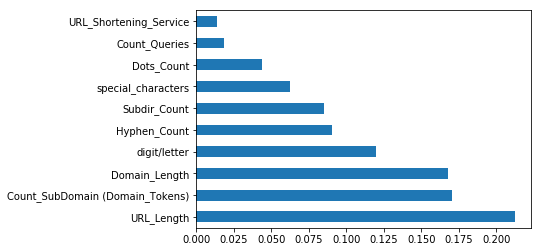

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
#X = data.iloc[:,1:12]  #independent columns
#y = data.iloc[:,-1].astype('int')   #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### 75% malicious 25% benign

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X = featureSet.values
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y,random_state=0)

9026


### SVM

In [38]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.8826116373477673

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9407983761840325


### Saving the Model

In [40]:
from joblib import dump, load
dump(model, 'version1_Lexical.pkl')


['version1_Lexical.pkl']